### 지도학습(Supervised Learning) ,분류(classification)
* 문제, 정답을 제공해주고 학습하게 하는 기계학습
* 회귀분석에서 문제/정답(Label)은? x(독립 변수),y(종속변수) , model.fit(X,y,....)
* 정답을 안줘도 학습하는 것이 있는가? 자연 분류?

* 분류시의 X,y?
 +점 (x,y) , 0이나 1로 분류

* 이진분류

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
num_samples =1000

class_0 = np.random.multivariate_normal(mean=[0.5, 0.5],
                                        cov=[[0.09, 0], [0, 0.09]], size=num_samples//2)
# 정규분포 _nomal은 평균과 표준편차가 주어줘야한다
# 무작위로 다수개_정균분포( x,y 평균이 0.5 ,: 공분산 행렬을 지정

# 0.02 , 0
# 0    , 0.02  대각선 요소(0.02,0.02): 평균으로 부터 이격된 정도 (얼마나 퍼지게 할 것인가)
# cov의 비대각선요소(0,0) : 상관관계가 없다 (상관관계: 선으로 나타내짐 기울기가 완만한가 아닌가)
# x,y의 상관 관계가 없다


공분산 행렬은 두 가지 정보를 담고 있는 표입니다:

각 변수의 퍼짐 정도: 예를 들어, 우리가 키와 몸무게를 측정한다고 할 때, 키가 얼마나 다양한지(즉, 평균에서 얼마나 많이 떨어지는지)를 나타냅니다. 이를 "분산"이라고 불러요. 공분산 행렬에서는 각 변수의 퍼짐 정도가 자기 자신과의 비교로 적혀 있어요.

변수끼리의 관계: 두 변수(예: 키와 몸무게)가 서로 관련이 있는지, 즉 키가 클수록 몸무게도 커지는지(양의 상관관계), 아니면 키가 클수록 몸무게가 줄어드는지(음의 상관관계)를 나타냅니다. 이것이 공분산이에요.

예시로 2개의 변수(키, 몸무게)를 생각하면 공분산 행렬은 이렇게 생깁니다:

css
코드 복사
  키   몸무게
키   [키와 키의 관계, 키와 몸무게의 관계]
몸무게 [몸무게와 키의 관계, 몸무게와 몸무게의 관계]
키와 키의 관계: 키가 얼마나 퍼져 있는지 (키의 분산)
몸무게와 몸무게의 관계: 몸무게가 얼마나 퍼져 있는지 (몸무게의 분산)
키와 몸무게의 관계: 키와 몸무게가 어떻게 같이 변하는지 (공분산)
이 표가 공분산 행렬이고, 서로 상관이 있으면 값이 크고, 없으면 0에 가까워져요!

In [ ]:
class_0.shape #(500, 2) 개수 와 차원 :점좌표 500개

(500, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

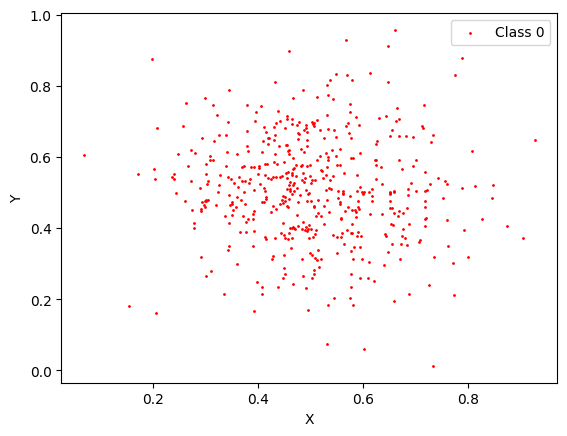

In [ ]:
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', s=1 ,label='Class 0')
#class_0[:, 0]: class_0에서 첫 번째 열(즉, 첫 번째 차원)에 해당하는 데이터를 가져옵니다. 이 값들은 x축에 해당합니다.
#class_0[:, 1]: class_0에서 두 번째 열(즉, 두 번째 차원)에 해당하는 데이터를 가져옵니다. 이 값들은 y축에 해당합니다.
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show
#scatter 산점도,산포도


<function matplotlib.pyplot.show(close=None, block=None)>

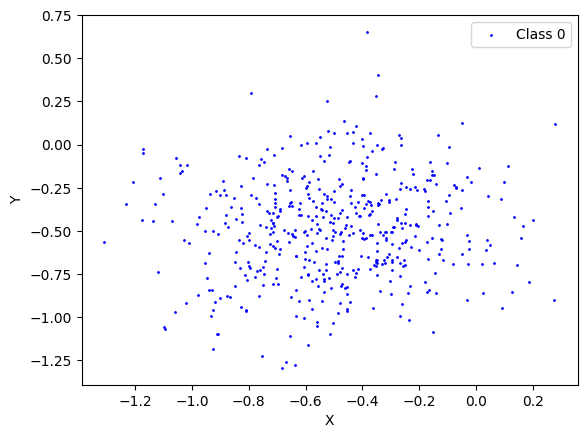

In [ ]:
# -0.5 , -0.5 중심으로 점 500 개 (class_1)

class_1= np.random.multivariate_normal(mean=[-0.5,-0.5],
                                        cov=[[0.09, 0], [0, 0.09]], size=num_samples//2)

plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', s=1 ,label='Class 0')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

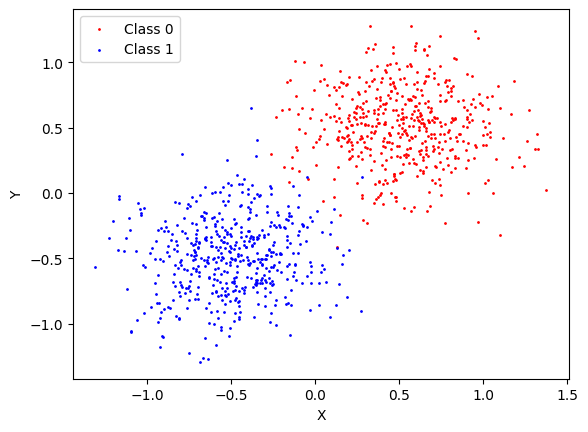

In [ ]:
# 2개 그룹의 점들을 한개의 차트에 모두 산점도로 표시해보세요
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', s=1 ,label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', s=1 ,label='Class 1')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show

In [ ]:
# 애매한 점은 어떻게 분류?

In [ ]:
X = np.concatenate((class_0, class_1), axis=0) # 상하로 합치기  ( 튜플 ,axis=0)
X.shape

(1000, 2)

In [ ]:
y = np.concatenate((np.zeros(num_samples//2), np.ones(num_samples//2)), axis=0)
y.shape

(1000,)

In [ ]:
# 데이터를 섞어서 그 중에서 20%를 검증용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 결과 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 2), (200, 2), (800,), (200,))

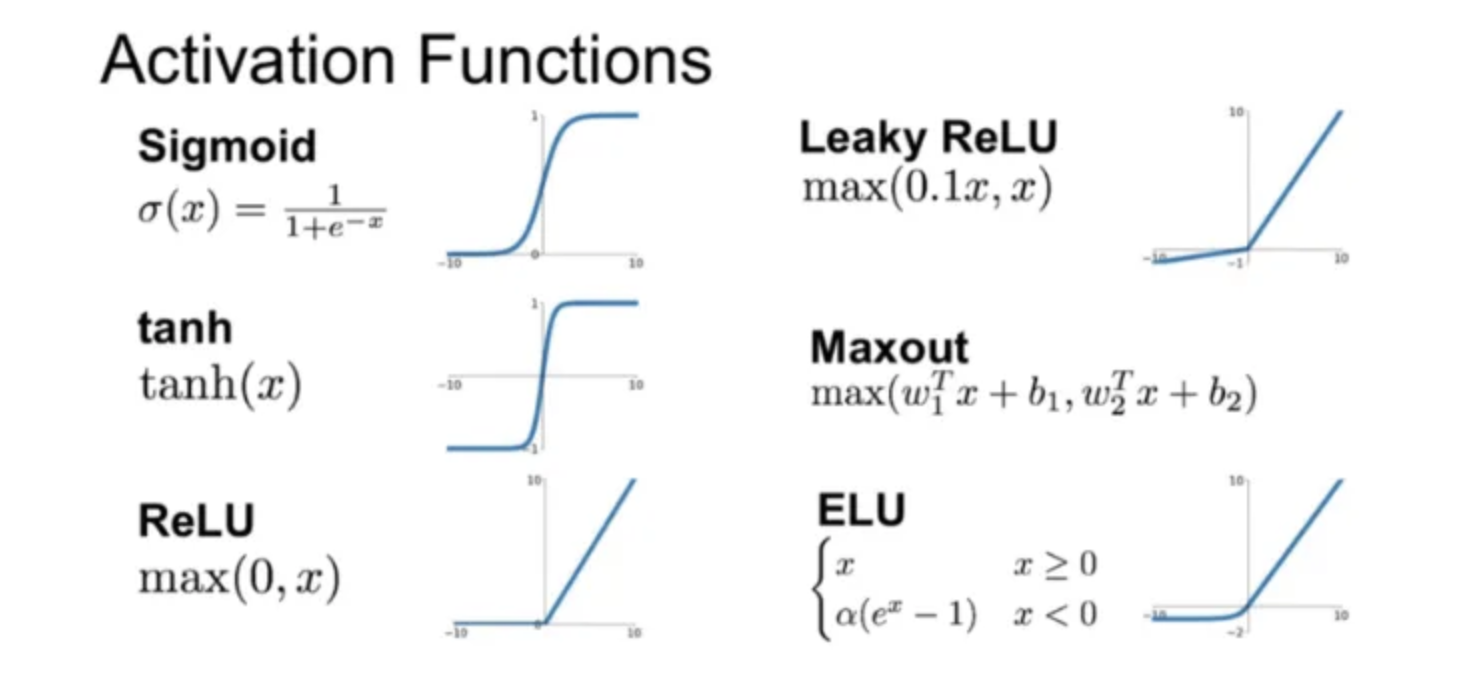

In [ ]:
# 모델 생성
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(2,activation='relu',input_shape=(2,)), # 입력
        tf.keras.layers.Dense(16,activation='relu'), # activation :활성함수
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')

]) # 분류랑 회귀랑 작동 방식이 다름
'''
위와 같이 리스트로 표현하는 방식도 있으니 참고
x가 음수면 y=0 , 양수면 y=양수
선형을 비선형으로 ,relu: 비선형을 제공함
'''

# Sigmoid : 이진 분류시 출력층 출력함수 ,

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'\n위와 같이 리스트로 표현하는 방식도 있으니 참고 \nx가 음수면 y=0 , 양수면 y=양수 \n선형을 비선형으로 ,relu: 비선형을 제공함 \n'

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 199 (796.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# loss='binary_crossentropy'  0,1사이라 오류가 적기에 학습 불가 ->
#  오차가 적은것을 확대해서  ,평가 지표: accuracy: 분류할때 씀 , 회귀:mse

In [ ]:
hist= model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))
# 하이퍼 파라미터: 개발자가 정의하는 것
# 10개까지를 보내서 모델이 추정한 값이 나오고 평균을 내서 오차를 내서 가중치를 갱신

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.0353 - val_accuracy: 0.9950 - val_loss: 0.0265
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9895 - loss: 0.0382 - val_accuracy: 0.9950 - val_loss: 0.0225
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.0359 - val_accuracy: 0.9950 - val_loss: 0.0200
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.0320 - val_accuracy: 0.9950 - val_loss: 0.0185
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0248 - val_accuracy: 0.9950 - val_loss: 0.0178
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0233 - val_accuracy: 0.9950 - val_loss: 0.0173
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0244 - val_accuracy: 0.9950 - val_loss: 0.0167
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9901 - loss: 0.0281 - val_accuracy: 0.9950 - v

In [ ]:
validation_data=(X_test,y_test)

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc)+1)

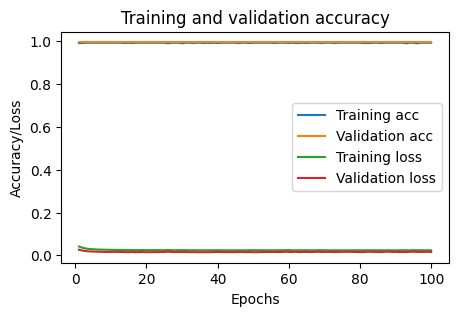

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

# Validation 학습에 참여하지 않은 데이터를 학습 시켜보면 거의 일치하는 모습

In [ ]:
model.evaluate(X_test, y_test) # 정확도 0.9991

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0096 


[0.015832889825105667, 0.9950000047683716]

In [ ]:
# 메모리에 생성된 분류 모델을 파일에 저장한다
model.save('/content/drive/MyDrive/Python_Basic/Data/classification_model.keras')
print('모델을 파일에 저장')

모델을 파일에 저장


In [ ]:
loaded_model=tf.keras.models.load_model('/content/drive/MyDrive/Python_Basic/Data/classification_model.keras')
print('파일에 저장된 모델을 읽어옴')

파일에 저장된 모델을 읽어옴


In [ ]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 599 (2.34 KB)

 Trainable params: 199 (796.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 400 (1.57 KB)

In [ ]:
#다시 로드된 분류 모델을 사용하여 특정 테이터가 어떤 영역에 속하는지 분류해보세요

# [1,-1], [-1,1]

In [ ]:
pred=loaded_model.predict(np.array([[1,-1],[-1,1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
pred

array([[0.03033799],
       [0.87666684]], dtype=float32)

In [ ]:
[1 if v>0.5 else 0 for v in pred]

[0, 1]

2145/2145 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


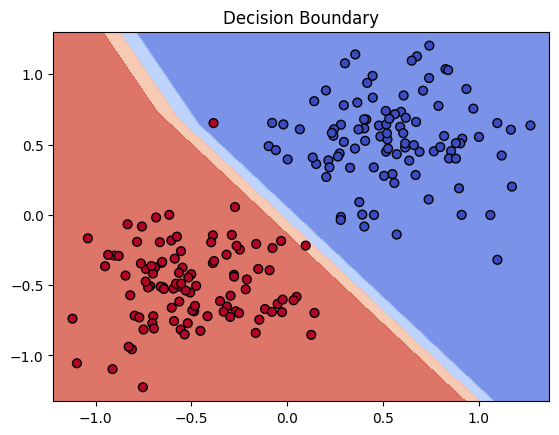

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1     # x좌표의 최소/최대
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1     # y좌표의 최소/최대
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))  # 2차원 격자 좌표 생성
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_probs = model.predict(grid).reshape(xx.shape)

    # 등고선 그리기 (0, 0.5, 1에 해당하는 값에서만 그려지고 그 사이값은 색으로 채워짐 )
    plt.contourf(xx, yy, pred_probs, levels=[0,0.2, 0.5, 0.8, 1], alpha=0.8, cmap='coolwarm') # 등고선 사이를 색으로 채움(f), viridis, plasma, inferno, coolwarm
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap='coolwarm')  # https://matplotlib.org/stable/users/explain/colors/colormaps.html
    plt.title('Decision Boundary')
    plt.show()

# 시각화
plot_decision_boundary(model, X_test, y_test)

#Tensorflow 이진분류 실습
* 데이터 평균이 [-0.5, 0.7] 인 데이터 500개 생성, cov=[[0.08,0], [0, 0.08]]
* 데이터 평균이 [0.5, -0.3] 인 데이터 500개 생성, cov=[[0.08,0], [0, 0.08]]
* 각 데이터의 시각화
* 2개의 데이터 합치기 (X 생성)
* Label 생성(y)
* 학습용/검증용 데이터 분할(0.2)
* 회귀모델 생성
* optimizer, loss, metrics 설정
* 학습
* 모델 평가(evaluate)
* 학습과정 차트 시각화
* 학습된 모델을 파일에 저장
* 파일로부터 모델 로드 및 실제 데이터 분류 및 결과 확인

In [ ]:
# class_0 생성

num_samples =1000
class_0 = np.random.multivariate_normal(mean=[-0.5, 0.7],
                                        cov=[[0.08, 0], [0, 0.08]], size=num_samples//2)

In [ ]:
# class_1 생성

class_1 = np.random.multivariate_normal(mean=[0.5,-0.3],
                                        cov=[[0.08, 0], [0, 0.08]], size=num_samples//2)

<function matplotlib.pyplot.show(close=None, block=None)>

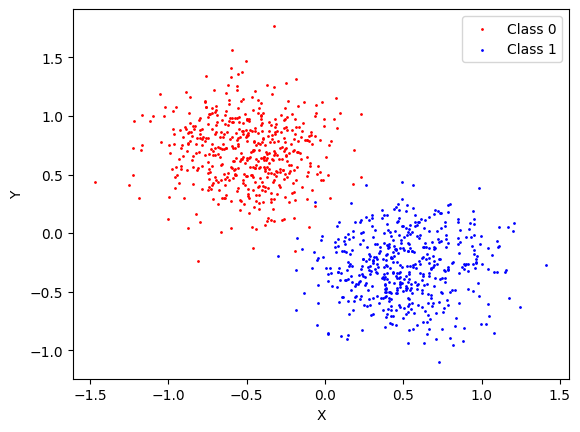

In [ ]:
# 각 데이터 시각화

plt.scatter(class_0[:, 0], class_0[:, 1], color='red', s=1 ,label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', s=1 ,label='Class 1')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show

In [ ]:
# 2개의 데이터 합치기 X 생성
X = np.concatenate((class_0, class_1), axis=0) # 상하로 합치기  ( 튜플 ,axis=0)
X.shape

(1000, 2)

In [ ]:
# Label 생성(y)
y = np.concatenate((np.zeros(num_samples//2), np.ones(num_samples//2)), axis=0)
y.shape

(1000,)

In [ ]:
# 학습용 검증요 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 2), (200, 2), (800,), (200,))

In [ ]:
# 회귀 모델 생성
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(2,activation='relu',input_shape=(2,)), # 입력
        tf.keras.layers.Dense(16,activation='relu'), # activation :활성함수
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')

])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 199 (796.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# optimizer, loss, metrics 설정
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# 학습
hist= model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8821 - loss: 0.6606 - val_accuracy: 0.9150 - val_loss: 0.5765
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9359 - loss: 0.5473 - val_accuracy: 0.9700 - val_loss: 0.3912
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9600 - loss: 0.3466 - val_accuracy: 0.9900 - val_loss: 0.1900
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9924 - loss: 0.1602 - val_accuracy: 1.0000 - val_loss: 0.0866
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9905 - loss: 0.0954 - val_accuracy: 1.0000 - val_loss: 0.0463
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0565 - val_accuracy: 1.0000 - val_loss: 0.0285
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9944 - loss: 0.0322 - val_accuracy: 1.0000 - val_loss: 0.0204
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9946 - loss: 0.0332 - val_accuracy: 1.0000 - v

In [ ]:
# 모델 평가(evaluate)
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0052      


[0.005345814861357212, 0.9950000047683716]

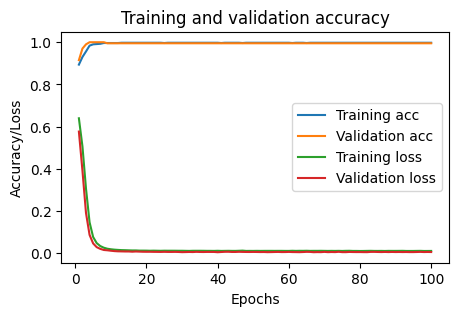

In [ ]:
# 학습과정 차트 시각화
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(5, 3))
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In [ ]:
# 학습된 모델을 파일에 저장
model.save('/content/drive/MyDrive/Python_Basic/Data/classification2_model.keras')
print('모델을 파일에 저장')

모델을 파일에 저장


In [ ]:
# 파일로부터 모델 로드 및 실제 데이터 분류 및 결과 확인
loaded_model=tf.keras.models.load_model('/content/drive/MyDrive/Python_Basic/Data/classification2_model.keras')
print('파일에 저장된 모델을 읽어옴')
loaded_model.summary()

파일에 저장된 모델을 읽어옴


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 599 (2.34 KB)

 Trainable params: 199 (796.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 400 (1.57 KB)

In [ ]:
pred=loaded_model.predict(np.array([[-1.0,-0.5],[1.0,-0.5]]))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.0016837 ],
       [0.99999857]], dtype=float32)

In [ ]:
[1 if v>0.5 else 0 for v in pred]

[0, 1]

2064/2064 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


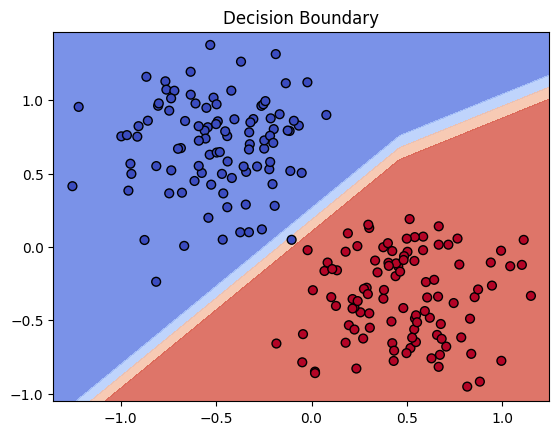

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1     # x좌표의 최소/최대
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1     # y좌표의 최소/최대
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))  # 2차원 격자 좌표 생성
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_probs = model.predict(grid).reshape(xx.shape)

    # 등고선 그리기 (0, 0.5, 1에 해당하는 값에서만 그려지고 그 사이값은 색으로 채워짐 )
    plt.contourf(xx, yy, pred_probs, levels=[0,0.2, 0.5, 0.8, 1], alpha=0.8, cmap='coolwarm') # 등고선 사이를 색으로 채움(f), viridis, plasma, inferno, coolwarm
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap='coolwarm')  # https://matplotlib.org/stable/users/explain/colors/colormaps.html
    plt.title('Decision Boundary')
    plt.show()

# 시각화
plot_decision_boundary(model, X_test, y_test)

# 다중분류
* iris 품종 분류 하기 (붓꽃)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [ ]:
iris= load_iris()
X= iris.data # 입력 데이터 (특징)
y= iris.target # 출력 데이터 (클래스 라벨)

In [ ]:
X.shape, y.shape # 150 행 속성 4

((150, 4), (150,))

In [ ]:
iris.target_names # 정답 'setosa', 'versicolor', 'virginica'
# 0,1,2가 들어가면 안됨 ,수치개념으로 컴퓨터가 산술계산 하게하면 안됨  범주형으로

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 정답 150개를 인코딩해야함

In [ ]:
X[:5] ,y[:5] #  문제 5개  한문제가 4개의 실수 정답 5개 : setosa

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [ ]:
# y의 값 구성 확인
np.unique(y)

array([0, 1, 2])

In [ ]:
# 라베을 원-핫 인코딩 ( 다중 분류에 사용) 범주형 숫자가 수치의 의미를 갖지 않도록 한다 위치 개념으로
y=tf.keras.utils.to_categorical(y,3)
# 굳이 왜하는 걸까 ?

In [ ]:
# 0일 확률, 1일 확률 ,,,2일 확률  : 0, 0, 1 이 실제값이면 손실은 어떻게 계산
#loss=( 0*log(0.01)+ 0*log(0.99) + 1*log(0.01)) # 1로 세팅된 자리만 손실 구할 수 있게   나머지 오차는 버린다



#다시 정리
'''
원핫 인코딩의 필요성
모델의 출력 형태 : 0.01, 0.99 ,0.01
오차 계산은 실제 정답인 컬럼만 계산해야 하므로 실제 정답이 [0,1,0]이라면
오차는 다음과 같이 계산되어   정답이 아닌 컬럼은 무시된다
loss=( 0*log(0.01)+ 1*log(0.99) + 0*log(0.01))
'''

In [ ]:
y[:5] # 첫번째 품종

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
y[50:55] # 2번째 품종

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
y[100:105] #3 번째 품종

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
X_train ,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=0)

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(4,activation='relu',input_shape=(4,)), # 입력
        tf.keras.layers.Dense(32,activation='relu'), # activation :활성함수
        tf.keras.layers.Dense(3,activation='softmax') # 출력층: 3개의 클래스
        # softmax가 내놓는 값을 합치면 1  확률 합치기  즉 100% (특징임)
        # 3개로 분류해서 3개의 확률을 얻어내야함

])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279 (1.09 KB)

 Trainable params: 279 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일 ( 다중 분류를 위해 sparse_categorical_crossentropy 사용)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])   # crossentropy 내부에서  로그함수로   오차를 증폭
                # 두개면은 바이너리엔트로피
hist= model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3980 - loss: 0.9634 - val_accuracy: 0.2000 - val_loss: 1.0532
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3566 - loss: 0.9429 - val_accuracy: 0.5667 - val_loss: 0.9888
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6936 - loss: 0.9008 - val_accuracy: 0.5667 - val_loss: 0.9408
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7501 - loss: 0.8339 - val_accuracy: 0.5667 - val_loss: 0.9002
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6611 - loss: 0.8219 - val_accuracy: 0.5667 - val_loss: 0.8549
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7256 - loss: 0.7606 - val_accuracy: 0.5667 - val_loss: 0.8172
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6571 - loss: 0.7563 - val_accuracy: 0.5667 - val_loss: 0.7658
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6180 - loss: 0.7314 - val_accuracy: 0.5667 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 정확도: {test_acc* 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 1.0000 - loss: 0.0805
테스트 정확도: 100.00%


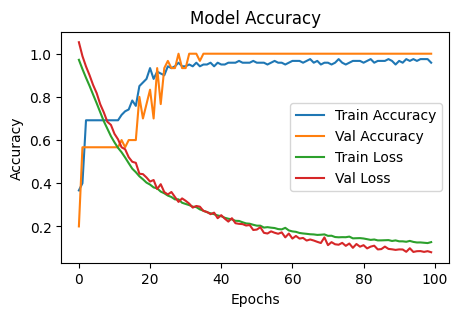

In [ ]:
# 학습 과정 시각화 (정확도)
plt.figure(figsize=(5, 3))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred=model.predict(X_test[:5]) # 품종 5개
pred.shape  # 학습된 결과가 3개가 나온다?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


(5, 3)

In [ ]:
pred
'''
       [2.7565972e-07, 7.6941266e-03, 9.9230558e-01], -> 9.9230558e-01
       [2.5127339e-03, 8.9070898e-01, 1.0677830e-01],
       [9.9795437e-01, 2.0454531e-03, 9.4502468e-08], -> 9.9795437e-01
       [7.7540142e-07, 3.7185073e-02, 9.6281415e-01],
       [9.9603820e-01, 3.9612730e-03, 5.0883853e-07]
'''

array([[2.7565972e-07, 7.6941266e-03, 9.9230558e-01],
       [2.5127339e-03, 8.9070898e-01, 1.0677830e-01],
       [9.9795437e-01, 2.0454531e-03, 9.4502468e-08],
       [7.7540142e-07, 3.7185073e-02, 9.6281415e-01],
       [9.9603820e-01, 3.9612730e-03, 5.0883853e-07]], dtype=float32)

In [ ]:
pred_labels=np.argmax(pred, axis=1)
pred_labels

array([2, 1, 0, 2, 0])

In [ ]:
iris.target_names[pred_labels]

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa'],
      dtype='<U10')


# csv 파일의 데이터를 로드하여 다중분류 모델을 생성하고
# 학습하여 학습네역을 시각화 및 평가하고
# 실제 데이터를 전달하여 적절히 추론하는지 확인해보세요
# 데이터 파일의 포맷(10개의 컬럼 + Label 컬럼, 총 11개의커럼)
# A급 , B급 , C급 , D급으로 분류 결과가 나오게 한다

In [448]:
# csv 파일 읽기
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Python_Basic/Data/classification_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.080690,-0.611057,0.447967,-2.403567,-0.931466,0.128236,1.643031,-0.753590,-0.908755,0.019924,3.0
1,1.394433,-0.152790,-1.564810,1.283688,0.679443,5.563829,-2.889507,2.646147,-3.446422,1.946944,0.0
2,-1.875724,4.347467,3.671975,-2.861984,-2.722457,7.247096,1.252764,3.545935,-0.092954,1.629410,1.0
3,-2.104461,-0.572790,2.380172,-1.379330,-0.318238,1.968818,-0.040969,-0.330910,-0.186575,0.987446,0.0
4,-1.758010,-1.336668,1.280594,-0.343716,-2.066382,-0.951725,3.103139,1.067741,0.786420,1.806212,3.0


In [450]:
import random
np.random.seed(0) # 0만써라
tf.random.set_seed(7) # 시드를 변경해보면서 테스트하면 값이 높게 나옴
random.seed(0)

In [451]:
# 마지막 컬럼 y Label
y=df.iloc[:,-1]
y.unique()

array([3., 0., 1., 2.])

In [452]:
y

,10
0,3.0
1,0.0
2,1.0
3,0.0
4,3.0
...,...
995,2.0
996,2.0
997,3.0
998,0.0


In [453]:
# 마지막 컬럼을 제외한 나머지 커럼의 행
X=df.iloc[:,:-1]
X

,0,1,2,3,4,5,6,7,8,9
0,2.080690,-0.611057,0.447967,-2.403567,-0.931466,0.128236,1.643031,-0.753590,-0.908755,0.019924
1,1.394433,-0.152790,-1.564810,1.283688,0.679443,5.563829,-2.889507,2.646147,-3.446422,1.946944
2,-1.875724,4.347467,3.671975,-2.861984,-2.722457,7.247096,1.252764,3.545935,-0.092954,1.629410
3,-2.104461,-0.572790,2.380172,-1.379330,-0.318238,1.968818,-0.040969,-0.330910,-0.186575,0.987446
4,-1.758010,-1.336668,1.280594,-0.343716,-2.066382,-0.951725,3.103139,1.067741,0.786420,1.806212
...,...,...,...,...,...,...,...,...,...,...
995,0.367189,-0.118830,1.848159,3.069068,1.268002,-5.432980,0.643032,-4.267174,0.503953,-0.677245
996,2.326781,-3.451773,-1.516361,0.645245,2.035588,-3.623966,0.006025,-4.394121,-3.958940,-2.962582
997,-3.296215,-2.796921,0.475504,5.462254,-1.577927,-6.800606,0.462862,-3.486969,0.836629,-4.612000
998,-0.617126,3.515838,3.993961,-1.459613,-0.735123,3.385283,-0.603580,-0.628028,0.673584,0.151678


In [454]:
X.shape


(1000, 10)

In [455]:
y.shape

(1000,)

In [456]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 레이블을 one-hot 인코딩으로 변환
y = tf.keras.utils.to_categorical(y, 4)

# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [457]:
# 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(10,)),  # 입력층
    tf.keras.layers.Dropout(0.2), #뉴런의 20%를 비활성화 데이터가 지나갈때마다 뉴런을 비활성화 목적: 특정 뉴런만 학습되어 잘 나오는 경우를 방지 하기 위함
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')  # 출력층 (4개의 클래스)
])

# 모델 구조 요약
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_179 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,026 (11.82 KB)

 Trainable params: 3,026 (11.82 KB)

 Non-trainable params: 0 (0.00 B)

In [458]:


# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [459]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # 10번은참아라

In [460]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Python_Basic/Data/best_model.keras',
    monitor='val_loss',
    verbose=1, # 저장할때마다 로그
    save_best_only=True,
    mode='min' # 검증 손실을 최소화 하는 방향으로 저장
)

In [461]:
# 모델 학습
hist = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test) ,callbacks=[early_stopping,checkpoint])


Epoch 1/100
50/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1911 - loss: 1.6174
Epoch 1: val_loss improved from inf to 1.32886, saving model to /content/drive/MyDrive/Python_Basic/Data/best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2092 - loss: 1.5735 - val_accuracy: 0.3450 - val_loss: 1.3289
Epoch 2/100
73/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3648 - loss: 1.3675
Epoch 2: val_loss improved from 1.32886 to 1.25986, saving model to /content/drive/MyDrive/Python_Basic/Data/best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3653 - loss: 1.3651 - val_accuracy: 0.4450 - val_loss: 1.2599
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4242 - loss: 1.2637
Epoch 3: val_loss improved from 1.25986 to 1.19457, saving model to /content/drive/MyDrive/Python_Basic/Data/best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4241 - loss: 1.2639 - val_accuracy: 0.4950 - val_loss: 1.1946
Epoch 4/100
72/80 ━━━━━━━━

In [463]:
test_loss, test_acc = model.evaluate(X_test, y_test)
#print(f"테스트 정확도: {test_acc* 100:.2f}%")
print(test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7570 - loss: 0.6377 
0.7799999713897705


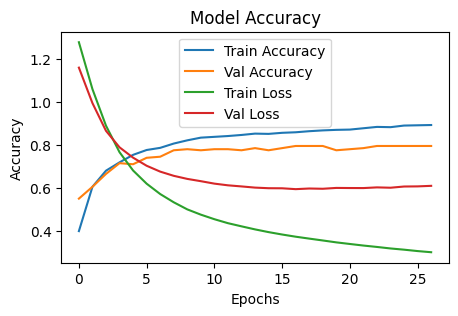

In [400]:
# 학습 과정 시각화 (정확도)
plt.figure(figsize=(5, 3))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()